In [1]:
#Item Similarity-Based Recommendation System

In [2]:
import numpy as np
import pandas as pd

In [3]:
column_names = ['user_id','item_id','rating','timestamp']

In [4]:
df = pd.read_csv('u.data',sep='\t',names=column_names)

#\t means that the file is tab-separated

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
#we are using the MovieLens recommendation dataset

In [7]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [8]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df = pd.merge(df,movie_titles,on='item_id')

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
sns.set_style('whitegrid')

In [13]:
df.groupby('title')['rating'].mean()

#mean rating for every title

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [15]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

#rating depends on how many people saw the movie; it is possible that 
#only one or two people saw these titles and ranked them perfectly,
#versus a well-known movie that is much less likely to have perfect
#reviews

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [20]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [21]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [22]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [23]:
ratings['num of ratings'] = df.groupby('title')['rating'].count()

In [24]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

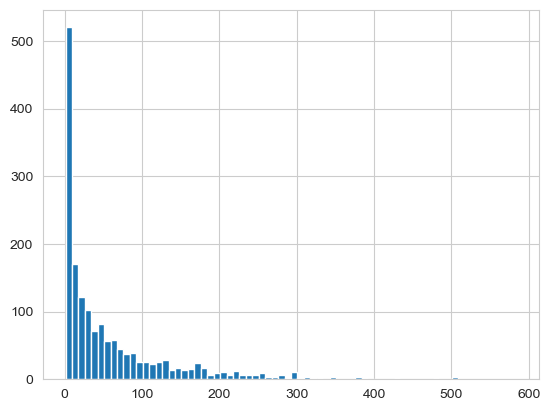

In [25]:
ratings['num of ratings'].hist(bins=70)

In [26]:
#shows that most movies do not get very many ratings.

<AxesSubplot:>

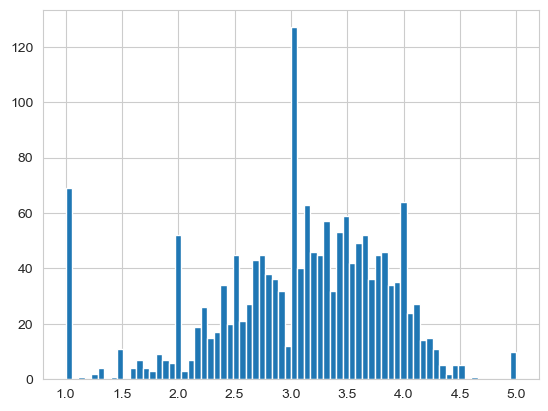

In [27]:
ratings['rating'].hist(bins=70)

In [28]:
#note that there are peaks at the whole numbers, these are likely 
#movies with fewer reviewers overall

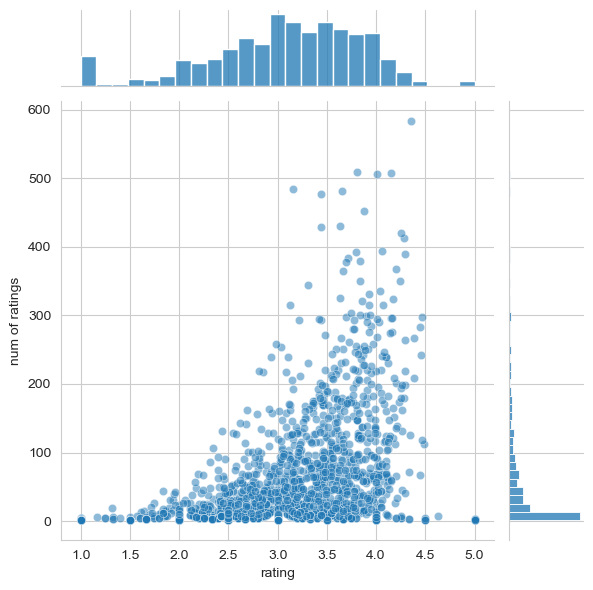

In [29]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [30]:
#seems that as you have more ratings, the higher they will be. There is
#one exception at the 5 star rating, which is likely because only a few
#people saw it and they all rated it highly.

In [31]:
#now making a matrix with a user ID on one axis and the movie title on
#the other, with each cell representing the score the user gave the movie

In [32]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [33]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [35]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#there are a lot of missing values bc most people have not seen every
#movie on the list, let alone reviewed.

In [37]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [38]:
#picking two movies at random: Star Wars and Liar Liar

In [39]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [40]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [43]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [42]:
#produces all titles and their correlation with the star wars user
#ratings. We are looking at the correlation of every other movie
#to that specific user behavior on star wars

In [44]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [45]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [46]:
similar_to_liarliar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [47]:
#data now needs to be cleaned by removing null values and turning it
#into a dataframe

In [48]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [49]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [50]:
#we should now be able to sort by values on this dataframe to show the
#movies that are most similar to star wars

In [52]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [53]:
#doesn't make sense; all these movies seem to have only been seen 
#by one other person who also happened to rate star wars as 5 stars

#this can be fixed by setting a threshold for number of ratings 
#necessary to fit into the model; this will filter out outliers

In [54]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])

#join is used instead of merge because the movie titles are the index
#of the data frame.

In [55]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [58]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',
    ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [59]:
corr_starwars[corr_starwars['num of ratings']>50].sort_values('Correlation',
    ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51


In [60]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [61]:
corr_liarliar

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
...,...
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016
Zeus and Roxanne (1997),-0.500000


In [62]:
corr_liarliar.dropna(inplace=True)

In [63]:
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [64]:
corr_liarliar

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41


In [66]:
corr_liarliar[corr_liarliar['num of ratings']>25].sort_values('Correlation',
        ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Deceiver (1997),0.851467,29
My Man Godfrey (1936),0.700794,27
"Prophecy, The (1995)",0.685905,32
Bio-Dome (1996),0.680800,31


In [73]:
similar_to_starwars.dropna().index[1:6]

Index(['1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '187 (1997)', '2 Days in the Valley (1996)'],
      dtype='object', name='title')

In [77]:
moviemat.corrwith(moviemat['Star Wars (1977)']).dropna()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns (1988)                        0.186377
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Length: 1410, dtype: float64

In [78]:
moviemat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 943
Columns: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
dtypes: float64(1664)
memory usage: 12.0 MB


In [132]:
#function that generates a list of the top five recommendations for
#an inputted movie. Takes a very long time to run on the full dataset.

def movieRecommender(movie):
    global ratings
    global moviemat
    similar_to_movie = moviemat.corrwith(moviemat[movie]).dropna()
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie = corr_movie.join(ratings['num of ratings'])
    top5 = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',
        ascending=False)[1:6]
    return top5.index

In [166]:
movieRecommender('Star Wars (1977)')

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Index(['Empire Strikes Back, The (1980)', 'Return of the Jedi (1983)',
       'Raiders of the Lost Ark (1981)',
       'Austin Powers: International Man of Mystery (1997)',
       'Sting, The (1973)'],
      dtype='object', name='title')

In [335]:
mostPopularMovies = ratings.sort_values('num of ratings',ascending=False).head(10)

In [202]:
#function that generates a list of the top five recommendations for
#an inputted movie. Takes a very long time to run on the full dataset.

def movieRecommender(movie):
    global ratings
    global moviemat
    similar_to_movie = moviemat.corrwith(moviemat[movie]).dropna()
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie = corr_movie.join(ratings['num of ratings'])
    top5 = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',
        ascending=False)[1:6]
    return top5.index

#reposted from above for ease of access

In [196]:
mostPopularMovies['dummyTitle'] = mostPopularMovies.index

for x in range(1,6):
    recommendation=[]
    for y in mostPopularMovies.index:
        recommendation.append(movieRecommender(y)[x-1])
    mostPopularMovies['Top '+str(x)+' Recommended']=recommendation
    
mostPopularMovies.drop('dummyTitle',axis=1,inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/l

In [197]:
mostPopularMovies

,rating,num of ratings,Top 1 Recommended,Top 2 Recommended,Top 3 Recommended,Top 4 Recommended,Top 5 Recommended
title,,,,,,,
Star Wars (1977),4.359589,584,"Empire Strikes Back, The (1980)",Return of the Jedi (1983),Raiders of the Lost Ark (1981),Austin Powers: International Man of Mystery (1...,"Sting, The (1973)"
Contact (1997),3.803536,509,Philadelphia (1993),"Mask, The (1994)",Young Guns (1988),Sling Blade (1996),Sneakers (1992)
Fargo (1996),4.155512,508,Sling Blade (1996),Lone Star (1996),Quiz Show (1994),Lawrence of Arabia (1962),True Romance (1993)
Return of the Jedi (1983),4.007890,507,"Empire Strikes Back, The (1980)",Star Wars (1977),Raiders of the Lost Ark (1981),Indiana Jones and the Last Crusade (1989),Sneakers (1992)
Liar Liar (1997),3.156701,485,Batman Forever (1995),"Mask, The (1994)",Down Periscope (1996),Con Air (1997),Pretty Woman (1990)


In [198]:
#there should be a way to do this without a for loop, possibly by
#altering the function.

In [308]:
def movieRecommenderNoLoop(movie):
    global ratings
    global moviemat
    global rank
    similar_to_movie = moviemat.corrwith(moviemat[movie]).dropna()
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie = corr_movie.join(ratings['num of ratings'])
    rec = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',
        ascending=False)
    return rec.index[rank]

In [330]:
for rank in range(1,6):
    testRatings['Top'+str(rank)+' Recommended']=testRatings['dummyTitle'].apply(movieRecommenderNoLoop)
    
    
#rank causes issues because the function wants to search for it as a key.

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/var/folders/1y/r55yw5b97vx40qpg2dsw_jvh0000gp/T/ipykernel_48824/1026888328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [331]:
testRatings

,rating,num of ratings,dummyTitle,Top1 Recommended,Top2 Recommended,Top3 Recommended,Top4 Recommended,Top5 Recommended
title,,,,,,,,
'Til There Was You (1997),2.333333,9,'Til There Was You (1997),"Edge, The (1997)",William Shakespeare's Romeo and Juliet (1996),Star Trek: The Wrath of Khan (1982),Dumbo (1941),Psycho (1960)
1-900 (1994),2.600000,5,1-900 (1994),"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994),"Boot, Das (1981)"
101 Dalmatians (1996),2.908257,109,101 Dalmatians (1996),Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)",Gone with the Wind (1939)
12 Angry Men (1957),4.344000,125,12 Angry Men (1957),Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994),Singin' in the Rain (1952)
187 (1997),3.024390,41,187 (1997),Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967),Stargate (1994)


In [283]:
testRatings['dummyTitle'].apply(movieRecommenderTest)


#this successfully creates a series with an index showing the rank
#of the top five movie recs from each movie in the index.

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


title
'Til There Was You (1997)    Index(['Beautiful Girls (1996)', 'Edge, The (1...
1-900 (1994)                 Index(['Rear Window (1954)', 'Full Monty, The ...
101 Dalmatians (1996)        Index(['101 Dalmatians (1996)', 'Murder at 160...
12 Angry Men (1957)          Index(['12 Angry Men (1957)', 'Ulee's Gold (19...
187 (1997)                   Index(['Star Trek: Generations (1994)', 'Maver...
Name: dummyTitle, dtype: object

In [291]:
testRatings['dummyTitle'].apply(movieRecommenderTest)

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


title
'Til There Was You (1997)    Index(['Beautiful Girls (1996)', 'Edge, The (1...
1-900 (1994)                 Index(['Rear Window (1954)', 'Full Monty, The ...
101 Dalmatians (1996)        Index(['101 Dalmatians (1996)', 'Murder at 160...
12 Angry Men (1957)          Index(['12 Angry Men (1957)', 'Ulee's Gold (19...
187 (1997)                   Index(['Star Trek: Generations (1994)', 'Maver...
Name: dummyTitle, dtype: object

In [338]:
#final result with the only for loop being the one to generate each
#new column in the rankings.

In [308]:
def movieRecommenderNoLoop(movie):
    global ratings
    global moviemat
    global rank
    similar_to_movie = moviemat.corrwith(moviemat[movie]).dropna()
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie = corr_movie.join(ratings['num of ratings'])
    rec = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',
        ascending=False)
    return rec.index[rank]

In [344]:
mostPopularMovies = ratings.sort_values('num of ratings',
    ascending=False).head(20)

#using the entire ratings dataframe gives an index error but any amount
#of movies in ratings can be plugged into mostPopularMovies and it still
#works.

In [345]:
mostPopularMovies['dummyTitle'] = mostPopularMovies.index

for rank in range(1,6):
    mostPopularMovies['Top '+str(rank)+' Recommended']=mostPopularMovies['dummyTitle'].apply(movieRecommenderNoLoop)
    
mostPopularMovies.drop('dummyTitle',axis=1,inplace=True)

#takes a very long time to run as the list grows longer.



/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/pyt

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/pyt

In [346]:
mostPopularMovies

,rating,num of ratings,Top 1 Recommended,Top 2 Recommended,Top 3 Recommended,Top 4 Recommended,Top 5 Recommended
title,,,,,,,
Star Wars (1977),4.359589,584,"Empire Strikes Back, The (1980)",Return of the Jedi (1983),Raiders of the Lost Ark (1981),Austin Powers: International Man of Mystery (1...,"Sting, The (1973)"
Contact (1997),3.803536,509,Philadelphia (1993),"Mask, The (1994)",Young Guns (1988),Sling Blade (1996),Sneakers (1992)
Fargo (1996),4.155512,508,Sling Blade (1996),Lone Star (1996),Quiz Show (1994),Lawrence of Arabia (1962),True Romance (1993)
Return of the Jedi (1983),4.007890,507,"Empire Strikes Back, The (1980)",Star Wars (1977),Raiders of the Lost Ark (1981),Indiana Jones and the Last Crusade (1989),Sneakers (1992)
Liar Liar (1997),3.156701,485,Batman Forever (1995),"Mask, The (1994)",Down Periscope (1996),Con Air (1997),Pretty Woman (1990)
"English Patient, The (1996)",3.656965,481,Unforgiven (1992),"Postino, Il (1994)",Schindler's List (1993),"Last of the Mohicans, The (1992)",Amistad (1997)
Scream (1996),3.441423,478,Scream 2 (1997),Seven (Se7en) (1995),Starship Troopers (1997),"Nightmare on Elm Street, A (1984)",Cape Fear (1991)
Toy Story (1995),3.878319,452,"Craft, The (1996)",Down Periscope (1996),Miracle on 34th Street (1994),G.I. Jane (1997),Amistad (1997)
Air Force One (1997),3.631090,431,"Hunt for Red October, The (1990)","Firm, The (1993)",Murder at 1600 (1997),Eraser (1996),Absolute Power (1997)


In [322]:
#using the entire ratings dataframe gives an index error but any amount
#of movies in ratings can be plugged into mostPopularMovies and it still
#works.